In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

import sys
from pathlib import Path

repo_parent = Path.cwd().resolve().parents[0]
if str(repo_parent) not in sys.path:
    sys.path.insert(0, str(repo_parent))

# 3) Autoreload to pick up edits to Maurice2/*
%load_ext autoreload
%autoreload 2

from main.dynamics import Dynamics
from main.dynamics2 import Dynamics2

In [3]:
xhat0 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) # Initial state estimate
sampling_rate = 50.0  # Hz
dt = 1.0 / sampling_rate

dynamics = Dynamics(dt=dt, x0=xhat0)

t=2.00
t=4.01
t=6.01
t=8.01
t=10.01
t=12.01


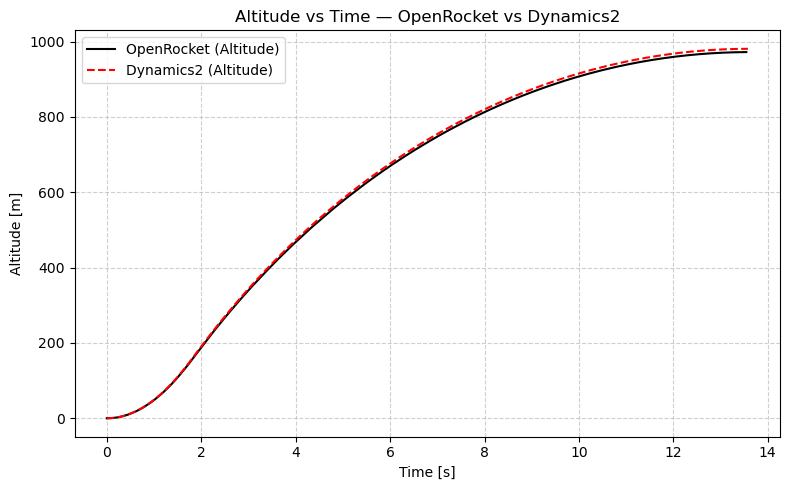

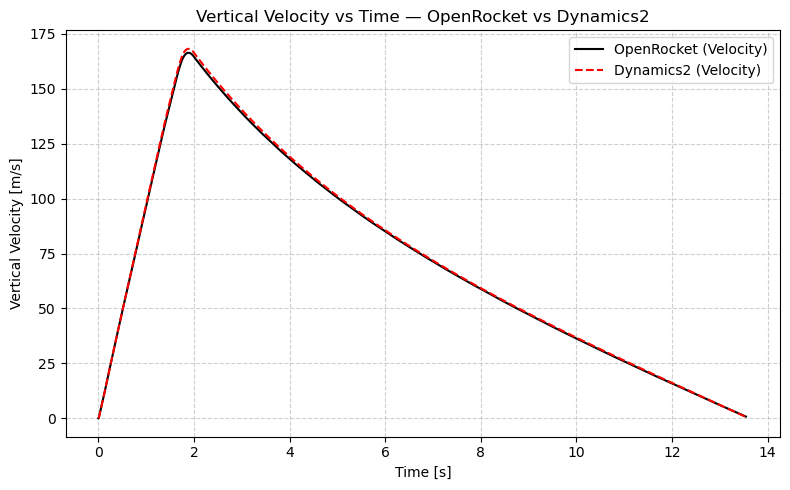

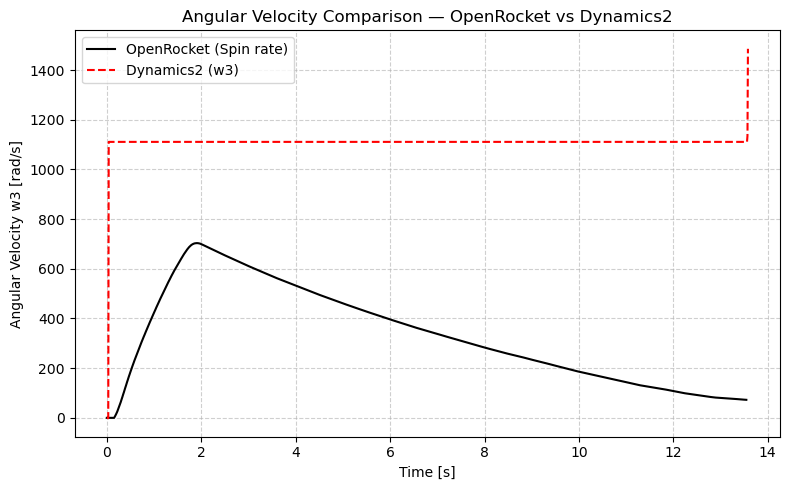

In [8]:
# ============================================================
# Compare Dynamics2 simulation with OpenRocket reference
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

# ------------------------------------------------------------
# Run Dynamics2 simulation
# ------------------------------------------------------------
x0 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=float)
dyn = Dynamics2(dt=0.01, x0=x0)
dyn.setup_eom()
t_sim, X_sim = dyn.run_rk4(verbose=True)

# Extract relevant states
w3_sim = X_sim[:, 2]
v3_sim = X_sim[:, 5]

# Altitude from integrating vertical velocity
alt_sim = np.cumsum(v3_sim) * dyn.dt

# ------------------------------------------------------------
# Load OpenRocket reference data
# ------------------------------------------------------------
or_data = pd.read_csv("../data/openrocket_data2.csv")
time = or_data['# Time (s)']
mask = time <= t_sim[-1]

t_or = time[mask].values
v3_or = or_data['Vertical velocity (m/s)'][mask].values
alt_or = or_data["Altitude (m)"][mask].values
w3_or = or_data['Roll rate (°/s)'][mask].values

# ------------------------------------------------------------
# Plot results
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(t_or, alt_or, 'k-', label="OpenRocket (Altitude)")
plt.plot(t_sim, alt_sim, 'r--', label="Dynamics2 (Altitude)")
plt.xlabel("Time [s]")
plt.ylabel("Altitude [m]")
plt.title("Altitude vs Time — OpenRocket vs Dynamics2")
plt.legend()
plt.grid(True, ls="--", alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(t_or, v3_or, 'k-', label="OpenRocket (Velocity)")
plt.plot(t_sim, v3_sim, 'r--', label="Dynamics2 (Velocity)")
plt.xlabel("Time [s]")
plt.ylabel("Vertical Velocity [m/s]")
plt.title("Vertical Velocity vs Time — OpenRocket vs Dynamics2")
plt.legend()
plt.grid(True, ls="--", alpha=0.6)
plt.tight_layout()
plt.show()

if w3_or is not None:
    plt.figure(figsize=(8,5))
    plt.plot(t_or, w3_or, 'k-', label="OpenRocket (Spin rate)")
    plt.plot(t_sim, w3_sim, 'r--', label="Dynamics2 (w3)")
    plt.xlabel("Time [s]")
    plt.ylabel("Angular Velocity w3 [rad/s]")
    plt.title("Angular Velocity Comparison — OpenRocket vs Dynamics2")
    plt.legend()
    plt.grid(True, ls="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No spin-rate column found in OpenRocket data.")
